# Support Vector Machine Algorithm on the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import chardet
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("ks-projects-201801.csv")
data.head(30)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [6]:
x_data = data.iloc[:, [3,6,8,10]]   # Main_Category, Goal, Pledged, Backers are independent values.
x_data.head()

,main_category,goal,pledged,backers
0,Publishing,1000.0,0.0,0
1,Film & Video,30000.0,2421.0,15
2,Film & Video,45000.0,220.0,3
3,Music,5000.0,1.0,1
4,Film & Video,19500.0,1283.0,14


In [7]:
data.state = ["successful" if each == "live" else each for each in data.state]   # Label to binary ( Successful, Live = 1)
data.state = [1 if each == "successful" else 0 for each in data.state]           #              ( Failed, Canceled etc. = 0)
y = data.iloc[:,9]
y.head(15)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    1
Name: state, dtype: int64

In [8]:
df = pd.DataFrame(x_data.iloc[:,0])
categories = pd.get_dummies(df)
for i in categories.columns:
    x_data.insert(loc=1, column=i, value=categories[i])
#x_data.head()

#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#enc.fit(x_data.iloc[:,0])
#enc.n_values_
#enc.feature_indices_
#enc.transform([[0, 1, 1]]).toarray()


#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(x_data.iloc[:,0])
#list(le.classes_)
#x_data.iloc[:,0] = le.transform(x_data.iloc[:,0])

x_data.iloc[:,[16,17,18]]  = (x_data.iloc[:,[16,17,18]] - np.min(x_data.iloc[:,[16,17,18]]))/(np.max(x_data.iloc[:,[16,17,18]]) - np.min(x_data.iloc[:,[16,17,18]]))
x_data.head(30)

c:\users\gunay.eser\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,main_category,main_category_Theater,main_category_Technology,main_category_Publishing,main_category_Photography,main_category_Music,main_category_Journalism,main_category_Games,main_category_Food,main_category_Film & Video,main_category_Fashion,main_category_Design,main_category_Dance,main_category_Crafts,main_category_Comics,main_category_Art,goal,pledged,backers
0,Publishing,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.999900e-06,0.000000e+00,0.000000
1,Film & Video,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.999999e-04,1.190325e-04,0.000068
2,Film & Video,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.499999e-04,1.081666e-05,0.000014
3,Music,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.999990e-05,4.916666e-08,0.000005
4,Film & Video,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.949999e-04,6.308082e-05,0.000064
5,Food,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.999999e-04,2.575104e-03,0.001021
6,Food,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9.999900e-06,5.924582e-05,0.000073
7,Food,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.499999e-04,2.227250e-05,0.000182
8,Design,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.250000e-03,4.047891e-04,0.000264
9,Film & Video,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6.499999e-04,3.068280e-04,0.000196


In [9]:
scores = list()
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(x_data.iloc[:,1:19], y, train_size = 0.25)
    svc = SVC(kernel="linear")
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append(svc.score(x_test,y_test))

c:\users\gunay.eser\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
c:\users\gunay.eser\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
c:\users\gunay.eser\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
c:\users\gunay.eser\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
c:\users\gunay.eser\appdata\local\programs\p

[0.6526887702643699, 0.6523155255707827, 0.6526289102663417, 0.6526500373244694, 0.652530317328413, 0.6516218538289271, 0.6539070972830603, 0.652016225580642, 0.6530162396653474]


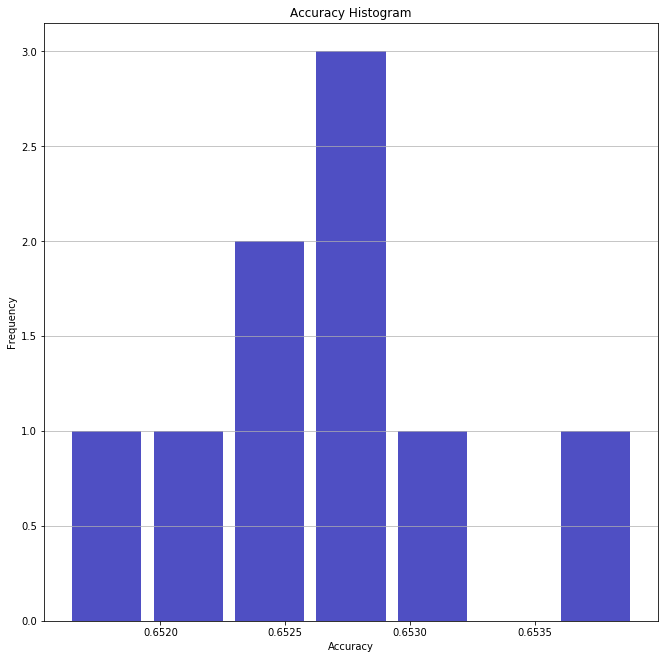

In [10]:
plt.figure(figsize=(11,11))
plt.hist(scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)                           
plt.grid(axis='y', alpha=0.90)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')
print(scores)